In [1]:
import tensorflow as tf
import numpy as np

1_Softmax Classifier
-------------
- y_data는 one-hot-encoding을 한 값이다.
- 따라서 Y의 shape은 [None, class의 개수]가 된다.

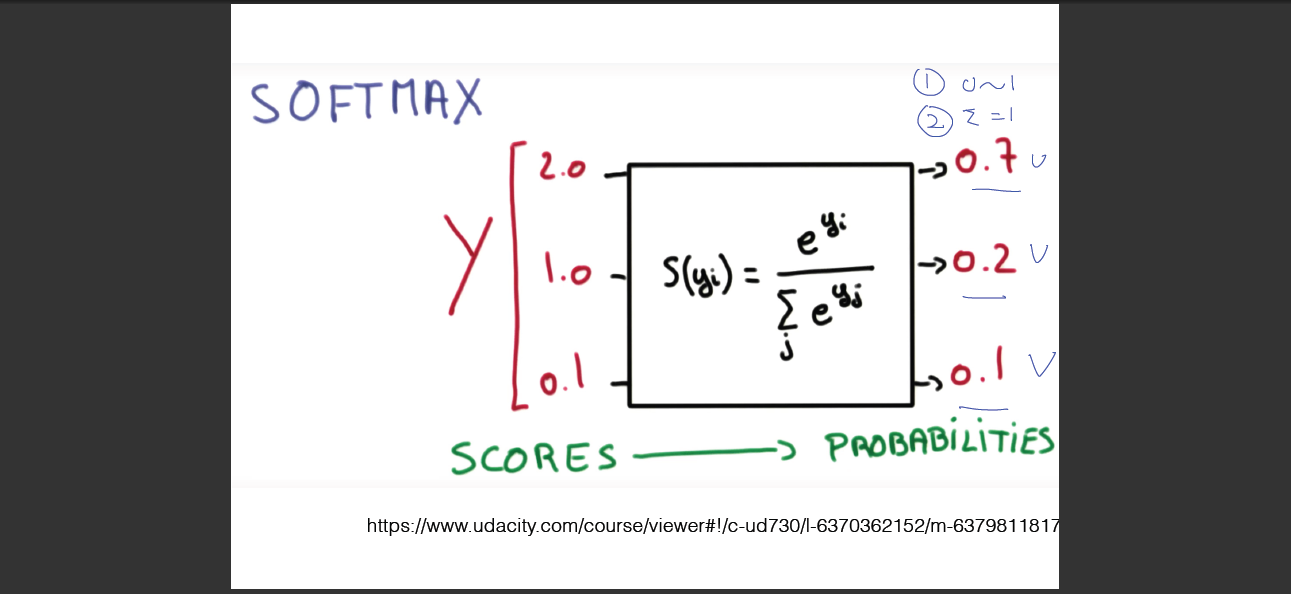
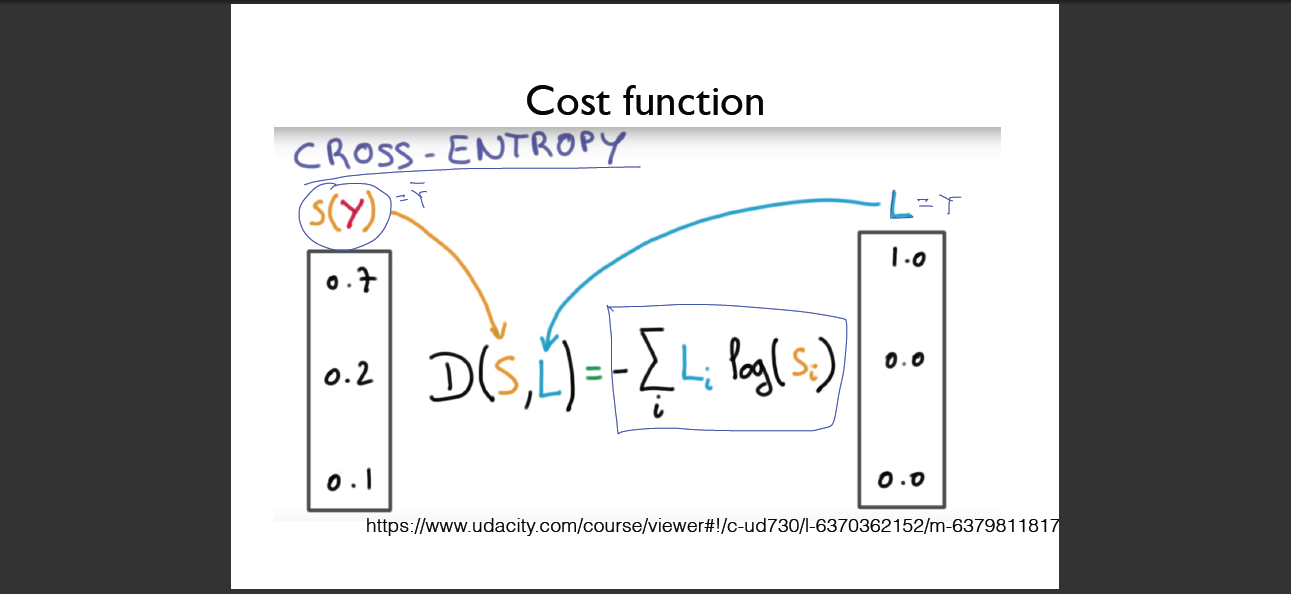
- hypothesis: tensorflow의 nn.softmax 함수를 이용하면 확률을 구해준다.
- cost function: 행 (axis=1) 단위로 더한 값 (reduce_sum 함수) 의 평균 (reduce_mean 함수)

In [2]:
# Lab 6 Softmax Classifier
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
        
    for step in range(2001):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))

    print('--------------')

    # Testing & One-hot encoding
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
    print(a, sess.run(tf.argmax(a, 1)))
    # tf.argmax(a, 1) = a에서 가장 큰 값 (index) 을 반환 (1은 axis - 행 방향)

    print('--------------')

    all = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
    print(all, sess.run(tf.argmax(all, 1)))
    # all처럼 한꺼번에 feed할 수도 있다

0 5.048625
200 0.5484252
400 0.4321487
600 0.35246667
800 0.27682927
1000 0.23268281
1200 0.21055315
1400 0.19221503
1600 0.17675203
1800 0.16353439
2000 0.15210819
--------------
[[1.3890496e-03 9.9860185e-01 9.0612912e-06]] [1]
--------------
[[1.3890496e-03 9.9860185e-01 9.0612912e-06]
 [9.3119204e-01 6.2902056e-02 5.9058950e-03]
 [1.2732767e-08 3.3411290e-04 9.9966586e-01]] [1 0 2]


2_Fancy Softmax Classifier
-------------
- cross_entropy 함수
- one_hot 함수
- reshape 함수

- logits = score; X * W + b로 나온 값
- hypothesis = probability; 즉 softmax는 score -> 0과 1 사이의 확률
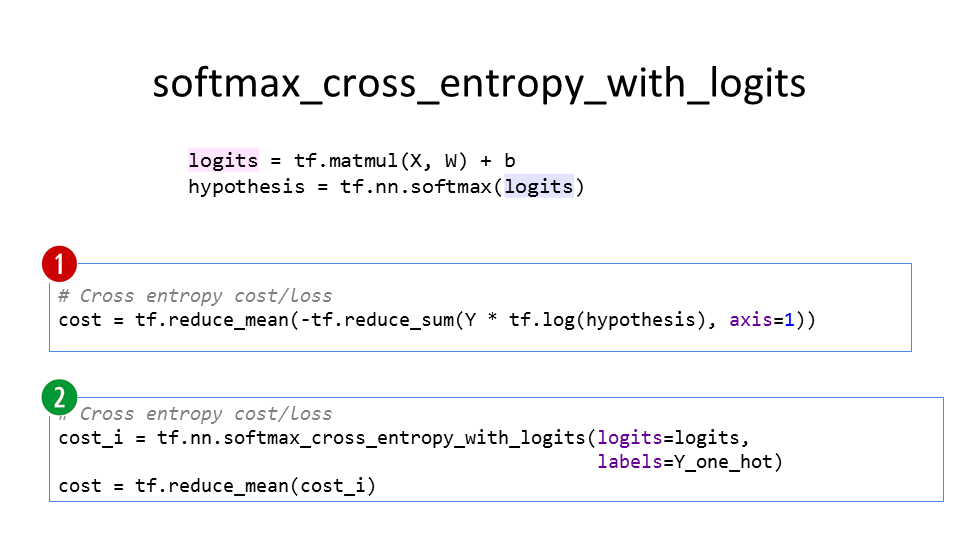
- 1보다 간편한 방법이 2의 softmax_cross_entropy_with_logits 함수
- logits = logits, labels = Y_one_hot (one-hot-encoding된 값들을 y로 받음)

Animal classification
-------------
- data-04-zoo.csv: 동물들의 16가지 특징을 가지고 0~6개 종류로 예측한다.
- y값이 0~6이기 때문에 one-hot으로 바꿔줘야 한다.

*tf.one_hot and reshape
-------------
- Y = tf.placeholder(tf.int32, [None, 1])
    - **0~6, shape=(?, 1)**


- Y_one_hot = tf.one_hot(Y, nb_classes)
    - **one hot shape=(?, 1, 7)**


- Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
    - **shape=(?, 7)**
---
If the input indices is rank N, the output will have rank N+1.

_= 한 개 차원이 더 생겨 ?와 7 사이에 1이 추가된다._

**=> reshape 함수를 이용하여 [-1, nb_classes]로 바꿔준다. (-1은 전체를 의미)**

In [4]:
# Lab 6 Softmax Classifier
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

# Predicting animal type based on various features
xy = np.loadtxt('C:/Users/rinseo/Documents/GitHub/DeepLearningZeroToAll/data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

nb_classes = 7  # 0 ~ 6

X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1])  # 0 ~ 6
Y_one_hot = tf.one_hot(Y, nb_classes)  # one hot
print("one_hot", Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
print("reshape", Y_one_hot)

W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

# Cross entropy cost/loss
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                 labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1) # 0~6
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2000):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={
                                 X: x_data, Y: y_data})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(
                step, loss, acc))

    # Let's see if we can predict
    pred = sess.run(prediction, feed_dict={X: x_data})
    # y_data: (N,1) = flatten => (N, ) matches pred.shape
    for p, y in zip(pred, y_data.flatten()):
        print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))

(101, 16) (101, 1)
one_hot Tensor("one_hot:0", shape=(?, 1, 7), dtype=float32)
reshape Tensor("Reshape:0", shape=(?, 7), dtype=float32)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Step:     0	Loss: 5.275	Acc: 9.90%
Step:   100	Loss: 0.626	Acc: 80.20%
Step:   200	Loss: 0.401	Acc: 87.13%
Step:   300	Loss: 0.300	Acc: 91.09%
Step:   400	Loss: 0.240	Acc: 94.06%
Step:   500	Loss: 0.200	Acc: 95.05%
Step:   600	Loss: 0.171	Acc: 95.05%
Step:   700	Loss: 0.149	Acc: 98.02%
Step:   800	Loss: 0.132	Acc: 99.01%
Step:   900	Loss: 0.118	Acc: 99.01%
Step:  1000	Loss: 0.107	Acc: 99.01%
Step:  1100	Loss: 0.097	Acc: 99.01%
Step:  1200	Loss: 0.089	Acc: 100.00%
Step:  1300	Loss: 0.082	Acc: 100.00%
Step:  1400	Loss: 0.076	Acc: 100.00%
Step:  1500	Loss: 0.071	Acc: 100.00%
Step:  1600	Loss: 0.067	Acc: 100.00%
Step:  1700	Loss: 0.063	Acc: 100.00%
Step:  1800	Loss: 0.

- flatten 함수: [[0], [1]] 형태를 [0, 1]로 바꿔준다.
- zip 함수: p, y로 각각 넘겨주기 쉽도록